In [1]:
import pandas as pd
messages=pd.read_csv(r"C:\Users\Rahul Sharma\Desktop\Data Sets\SMSSpamCollection",
                    sep='\t',names=['label','message'])

In [2]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
messages.shape

(5572, 2)

In [4]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
messages.tail(1)

,label,message
5571,ham,Rofl. Its true to its name


In [6]:
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Rahul
[nltk_data]     Sharma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
corpus=[]

In [8]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
corpus=[]
for i in range(len(messages)):
    review=re.sub('[^a-zA-Z]', ' ',messages['message'][i])
    review=review.lower()
    review=review.split()
    #review=[ps.stem(word) for word in review if word not in set(stopwords.words('english'))]
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review=' '.join(review)
    corpus.append(review)

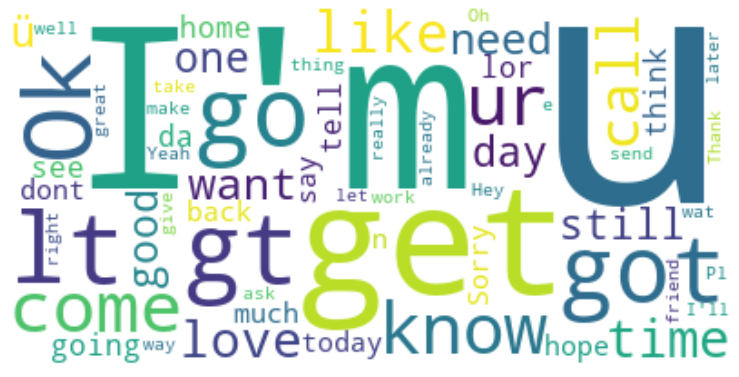

In [81]:
import matplotlib.pyplot as plt
%matplotlib inline 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator 

text=list(set(ham['message']))
plt.rcParams['figure.figsize']=(13,13)
wordcloud=WordCloud(max_font_size=180,max_words=60,background_color='white',stopwords=stopwords.words('english')).generate(str(text))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

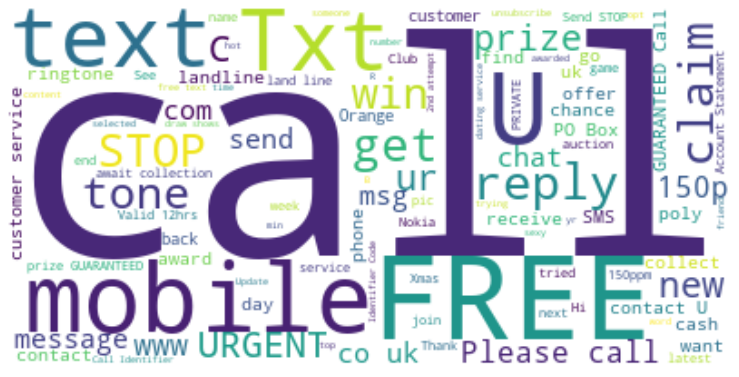

In [68]:
text=list(set(spam['message']))
plt.rcParams['figure.figsize']=(13,13)
wordcloud=WordCloud(max_font_size=180,max_words=100,background_color='white',stopwords=stopwords.words('english')).generate(str(text))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [17]:
corpus[-1]

'rofl true name'

In [19]:
#creating bag of words 
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=5000)
X=cv.fit_transform(corpus).toarray()

In [20]:
want=cv.fit_transform(corpus).toarray()

In [21]:
want.shape

(5572, 5000)

In [22]:
trtr=X[-1]
trtr

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [23]:
X[-1]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [24]:
y=pd.get_dummies(messages['label'])
y.drop('ham',axis=1,inplace=True)

In [59]:
y.head()

,spam
0,0
1,0
2,1
3,0
4,0


In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=0)


In [27]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model=MultinomialNB().fit(X_train,Y_train)
y_pred=spam_detect_model.predict(X_test)

c:\users\rahul sharma\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [28]:
from sklearn.metrics import confusion_matrix
confusion_m=confusion_matrix(Y_test,y_pred)

In [29]:
confusion_m

array([[946,   9],
       [  8, 152]], dtype=int64)

<AxesSubplot:>

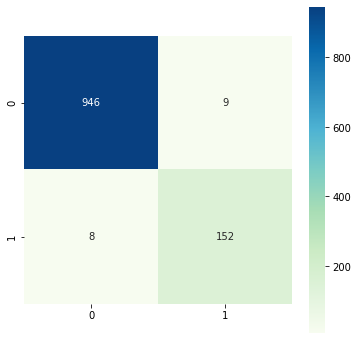

In [58]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.figure(figsize=(6,6))
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_m,square=True,annot=True,fmt='d',cbar=True,cmap=plt.cm.GnBu)

In [30]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(Y_test,y_pred)
accuracy

0.9847533632286996

# My String 

In [31]:
mess="Todays Voda numbers ending 7548 areselected to receive a $350 award. If you have a match please call 08712300220 quoting claim code 4041 standard rates app"
corpus.append(mess)

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=5000)
X1=cv.fit_transform(corpus).toarray()

In [33]:
X1

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=int64)

In [34]:
trtr=X1[[-1]]

In [35]:
answer=spam_detect_model.predict(trtr)

In [36]:
if answer == 1: 
    print("This is a spam message ")

This is a spam message 


In [37]:
mess="Thanks for your subscription to Ringtone UK your mobile will be charged £5/month Please confirm by replying YES or NO. If you reply NO you will not be charged"

In [38]:
corpuss=[]
rev=re.sub('[^a-zA-Z]',' ',mess)
rev=rev.lower()
rev=rev.split()
rev=[ps.stem(word) for word in rev if not word in stopwords.words('english')]
rev=' '.join(rev)
corpuss.append(rev)

In [39]:
corpuss

['thank subscript rington uk mobil charg month pleas confirm repli ye repli charg']

In [40]:
from sklearn.feature_extraction.text import CountVectorizer
cv1=CountVectorizer()
pre=cv1.fit_transform(corpus).toarray()

In [41]:
y_pre=spam_detect_model.predict(X[[-1]])

In [42]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [43]:
ham=messages.query('label=="ham"')

In [44]:
spam=messages.query('label=="spam"')

In [45]:
ham.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
6,ham,Even my brother is not like to speak with me. ...
